In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from biosppy import storage
from biosppy.signals import ecg

signal, metadata = storage.load_txt('ecg.txt')

In [ ]:
SAMPLING_RATE = metadata['sampling_rate'] ### TODO!
SECONDS = len(signal)-1/SAMPLING_RATE ### TODO!
print(SAMPLING_RATE, SECONDS)

1000.0 14999.999


In [ ]:
# DOCUMENTATION REFERENCE: https://biosppy.readthedocs.io/en/stable/tutorial.html?highlight=ecg.ecg#signal-processing
#USING ecg.ecg method from the BioSPPY documentation
output = ecg.ecg(signal=signal, sampling_rate=1000., show=False)



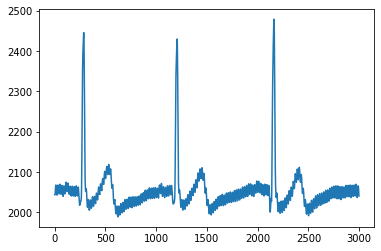

In [ ]:
#PLOTTING THE UNFILTERED SIGNAL, FIRST 3 SECONDS

plt.plot(signal[0:int(3 * SAMPLING_RATE)])

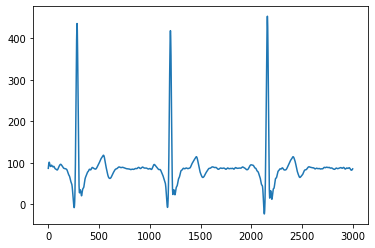

In [ ]:
#PLOTTING THE FILTERED SIGNAL

#filtered_array = output['filtered']
plt.plot(filtered_array[0:int(3 * SAMPLING_RATE)]) # 0:3000 is ok too!

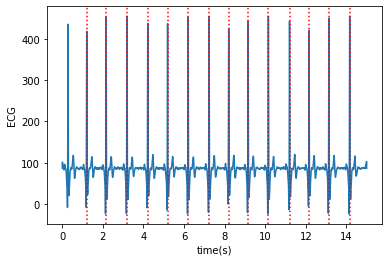

In [ ]:
#MARKING R PEAKS WITH THE VERTICAL LINES
#heart_rate_ts = output['heart_rate_ts']
t = np.arange(len(filtered_array)) / SAMPLING_RATE 
plt.plot(t, filtered_array)
plt.xlabel("time(s)")
plt.ylabel("ECG")

for h in heart_rate_ts:
  plt.axvline(x = h, color = 'r', ls=':')

plt.show()

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


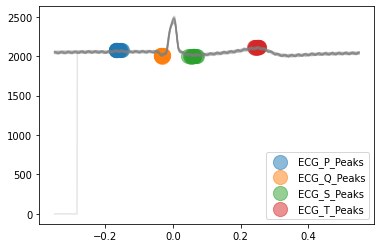

In [ ]:
#DETECTING USING nk.ecg_delineate
#DOCUMENTATION REFERENCE: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html

offset_onset ,peaks = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak", show=True, show_type='peaks')



In [ ]:
# TODO Does the detection work well?
#YES WE CAN USE ecg_delineate
#THE DETECTION WORKS

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# DOCUMENTATION REFERENCE https://neuropsychology.github.io/NeuroKit/functions/signal.html?highlight=signal%20filter#neurokit2.signal_filter

#cleaned = nk.signal_filter(signal, lowcut=2, highcut=50)
cleaned = nk.signal_filter(signal, lowcut=0.5, highcut=50)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


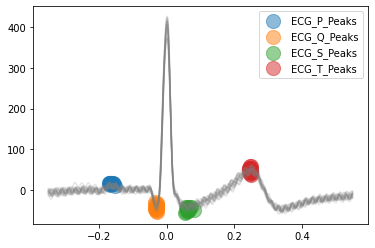

In [ ]:
offset_onset, cleaned_peaks = nk.ecg_delineate(cleaned, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


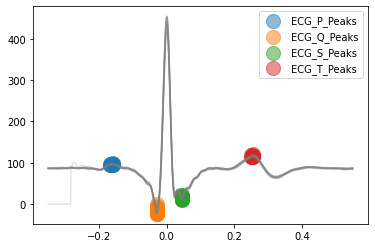

In [ ]:
offset_onset, filtered_peaks = nk.ecg_delineate(filtered_array, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')
#print(heart_rate)

In [ ]:
# TODO Which one works the best?
#FILTERED SIGNAL FROM BIOSPYY WORKS THE BEST

In Collaboration with kevin Ravinderan

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#